In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import datetime
now = datetime.datetime.now

# %% Own modules
import data as ld
import plots as lp
import core_naive_RNN as hc

2025-02-02 14:54:31.930802
Epoch 1/10000
1/1 - 1s - loss: 0.8593 - 858ms/epoch - 858ms/step
Epoch 2/10000
1/1 - 0s - loss: 0.8477 - 12ms/epoch - 12ms/step
Epoch 3/10000
1/1 - 0s - loss: 0.8368 - 9ms/epoch - 9ms/step
Epoch 4/10000
1/1 - 0s - loss: 0.8265 - 10ms/epoch - 10ms/step
Epoch 5/10000
1/1 - 0s - loss: 0.8168 - 10ms/epoch - 10ms/step
Epoch 6/10000
1/1 - 0s - loss: 0.8074 - 9ms/epoch - 9ms/step
Epoch 7/10000
1/1 - 0s - loss: 0.7985 - 12ms/epoch - 12ms/step
Epoch 8/10000
1/1 - 0s - loss: 0.7898 - 10ms/epoch - 10ms/step
Epoch 9/10000
1/1 - 0s - loss: 0.7814 - 12ms/epoch - 12ms/step
Epoch 10/10000
1/1 - 0s - loss: 0.7733 - 10ms/epoch - 10ms/step
Epoch 11/10000
1/1 - 0s - loss: 0.7654 - 11ms/epoch - 11ms/step
Epoch 12/10000
1/1 - 0s - loss: 0.7576 - 12ms/epoch - 12ms/step
Epoch 13/10000
1/1 - 0s - loss: 0.7499 - 12ms/epoch - 12ms/step
Epoch 14/10000
1/1 - 0s - loss: 0.7424 - 11ms/epoch - 11ms/step
Epoch 15/10000
1/1 - 0s - loss: 0.7350 - 11ms/epoch - 11ms/step
Epoch 16/10000
1/1 - 0s 

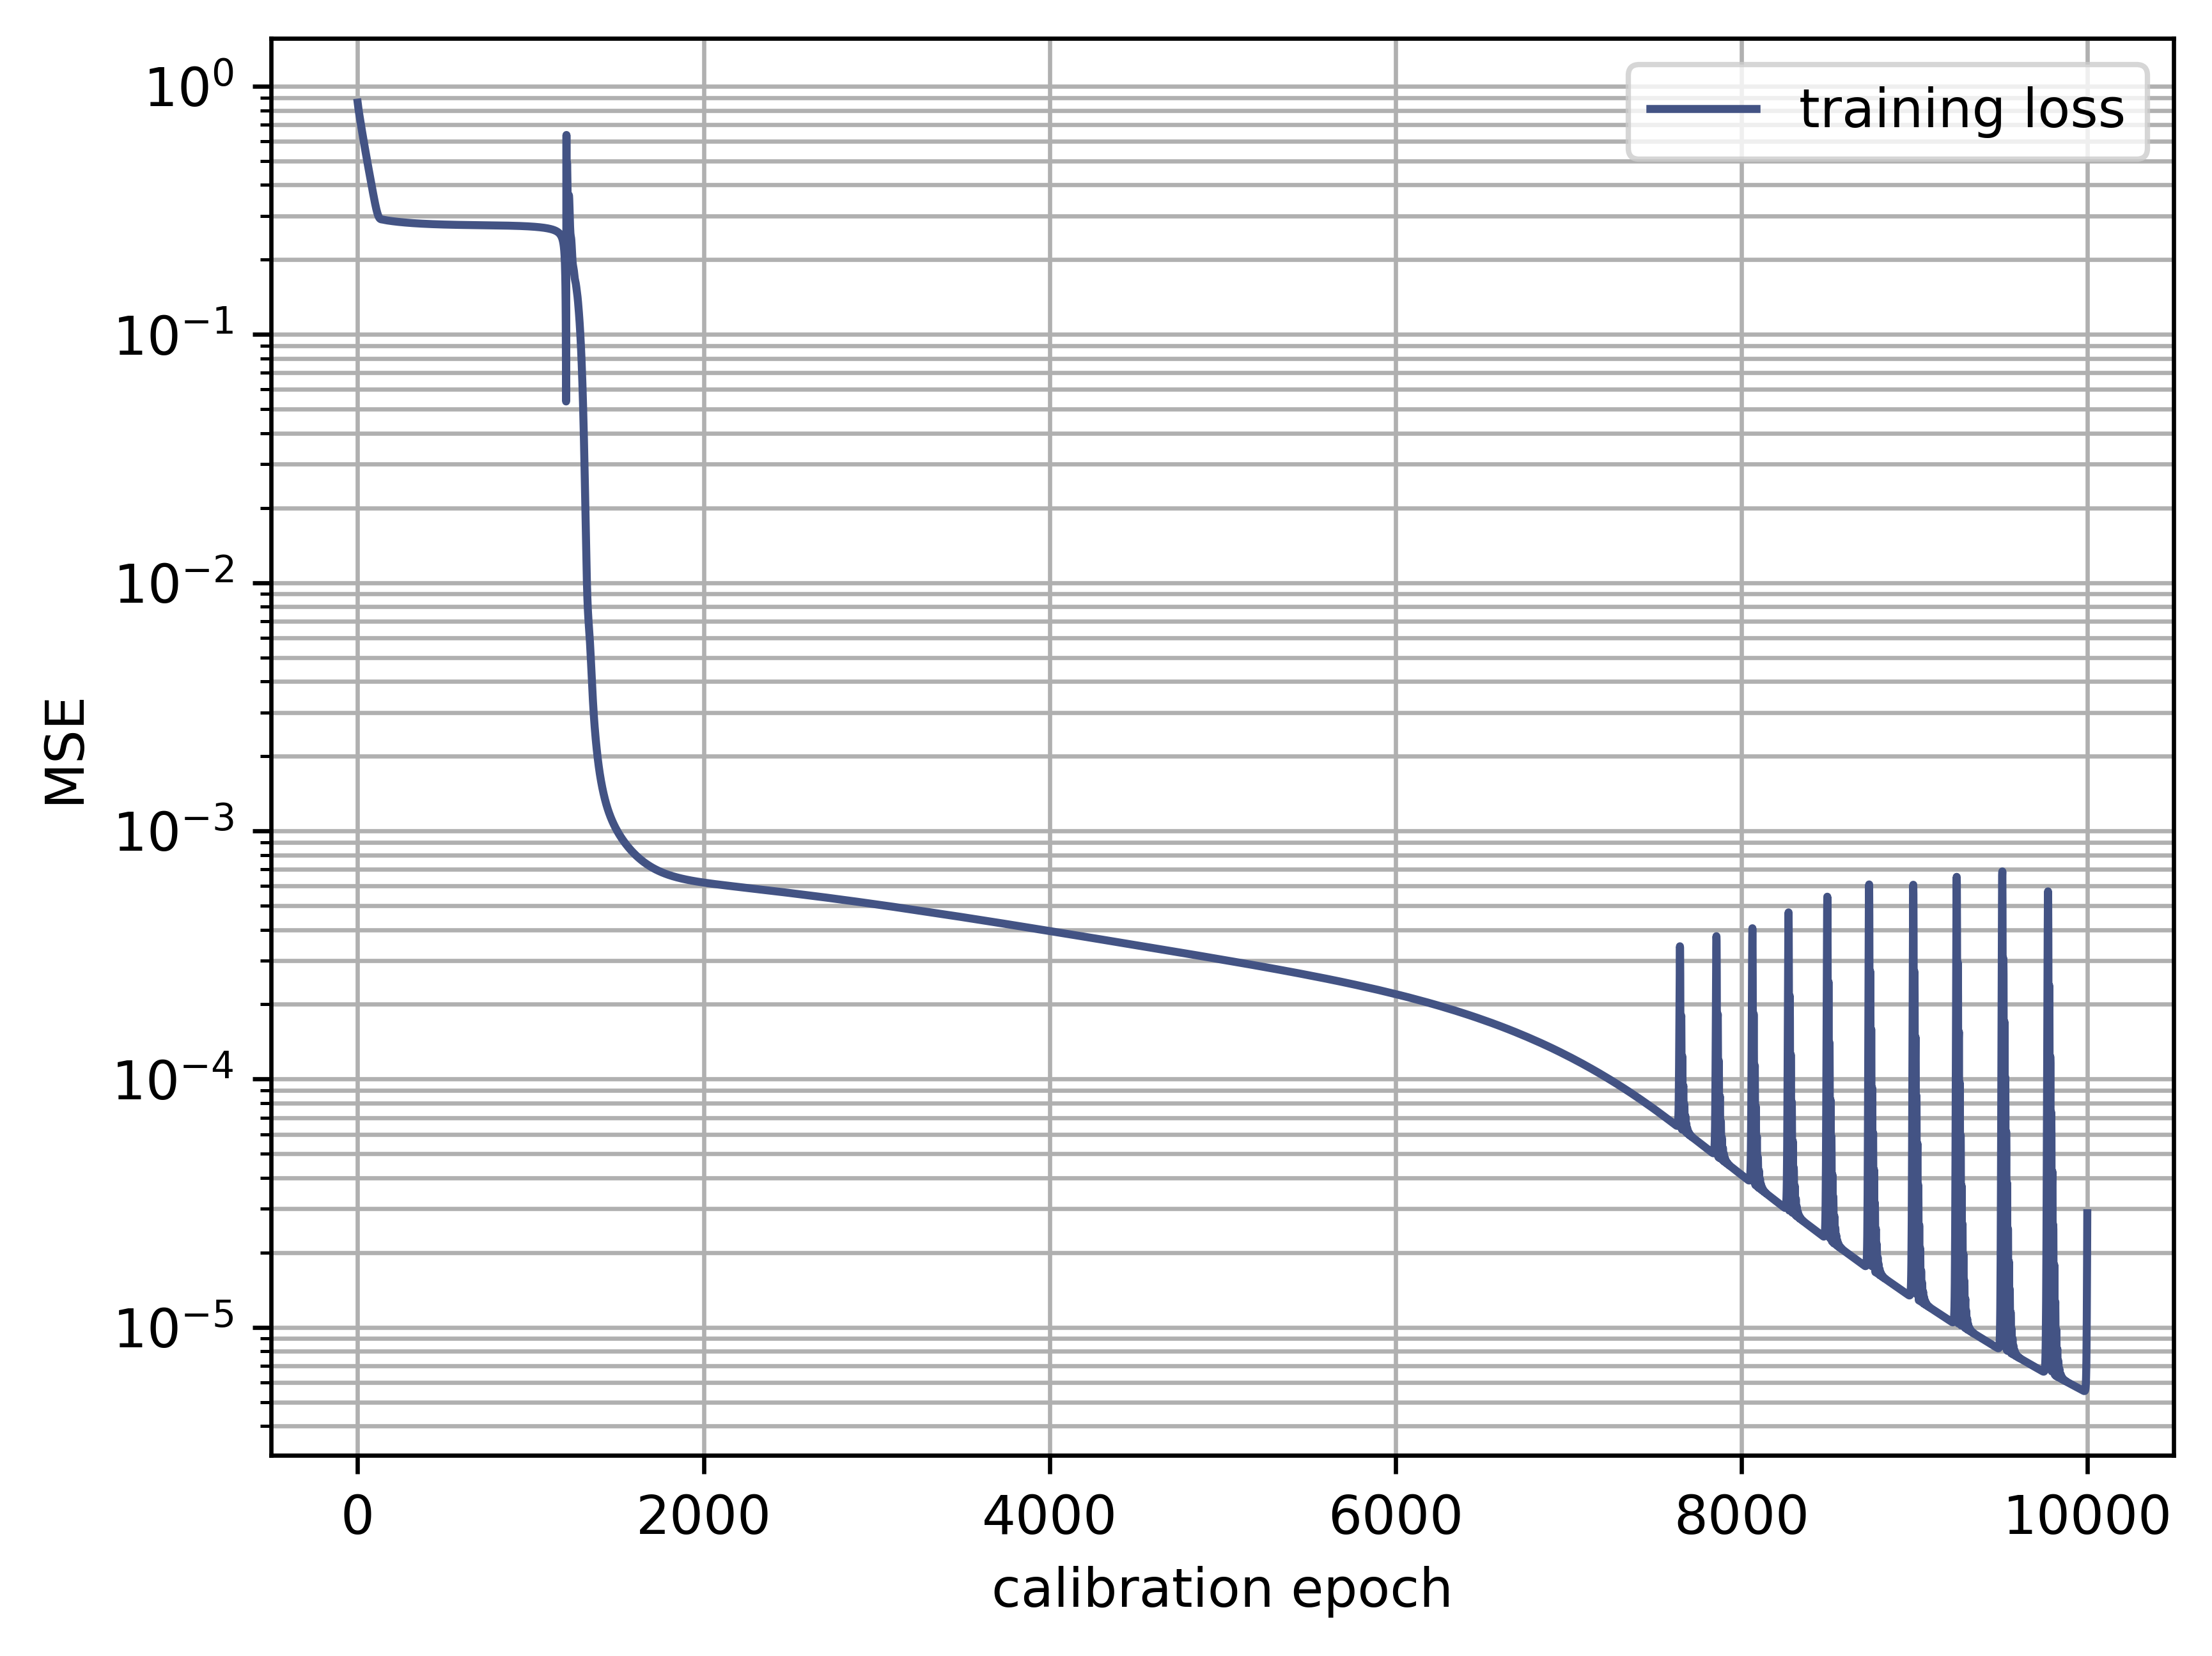

In [14]:
import numpy as np
# %%   
"""
Load and visualize data

"""


# 参数设置
E_infty = 0.5
E = 2
eta = 1

omegas = [1]
As = [1]

n = 100

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)

#lp.plot_data(eps, eps_dot, sig, omegas, As)



# %%   
"""
Load and evaluate model

"""

model = hc.main()


t1 = now()
print(t1)

tf.keras.backend.set_value(model.optimizer.learning_rate, 0.001)
h = model.fit([eps, dts], [sig], epochs = 10000,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')


plt.figure(1, dpi=600)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()





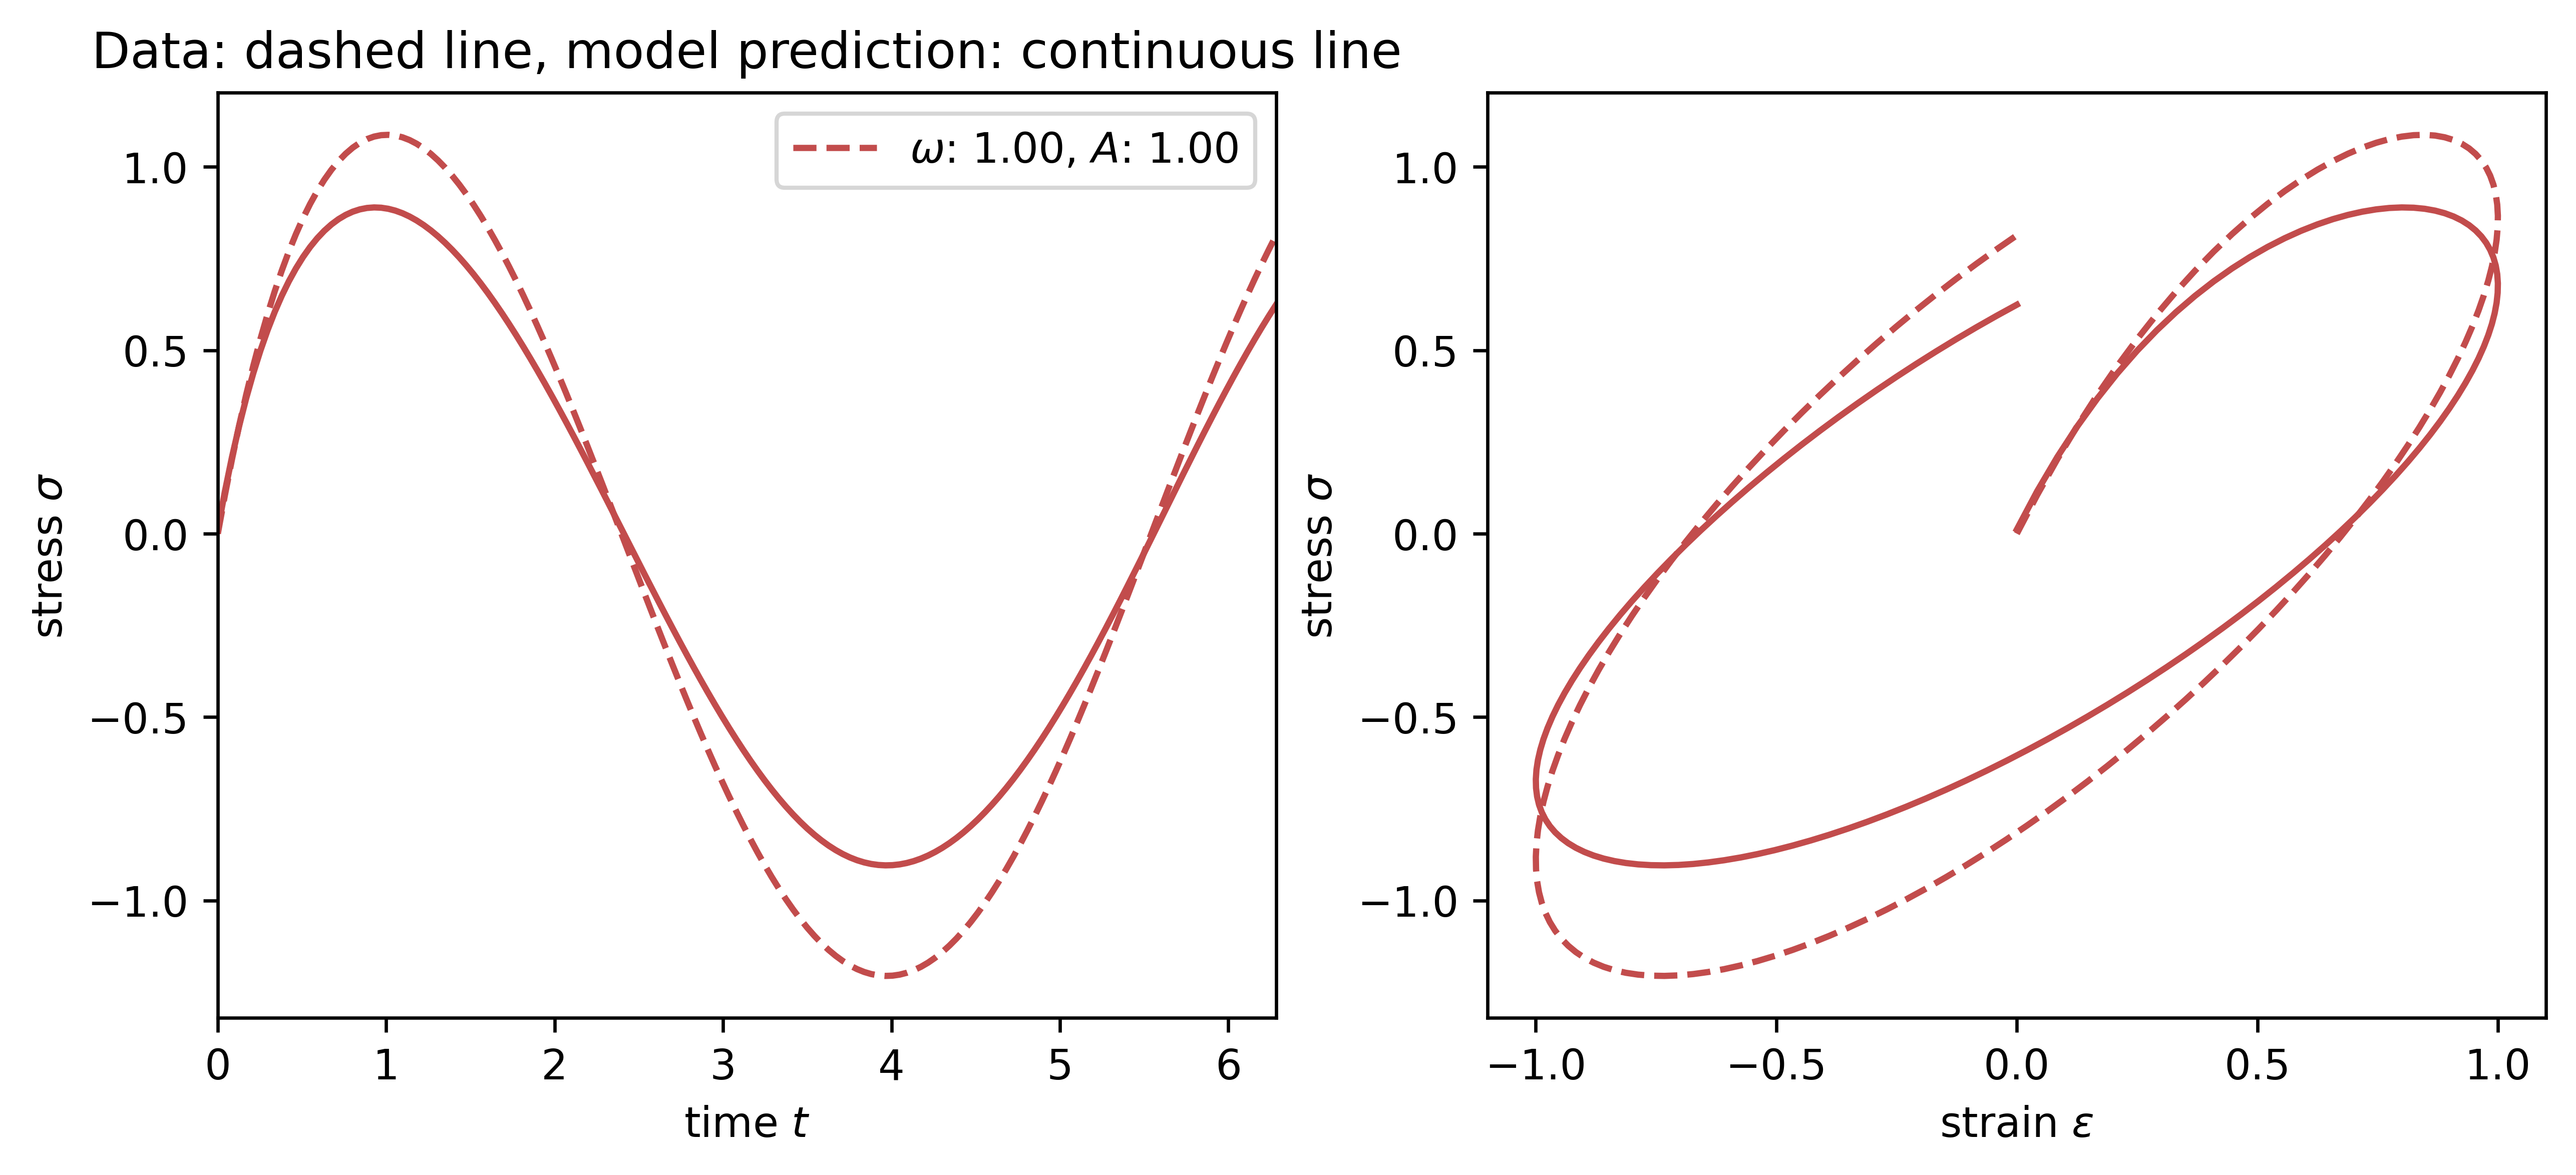

In [16]:
n = 150
As = [1]
omegas = [1]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)



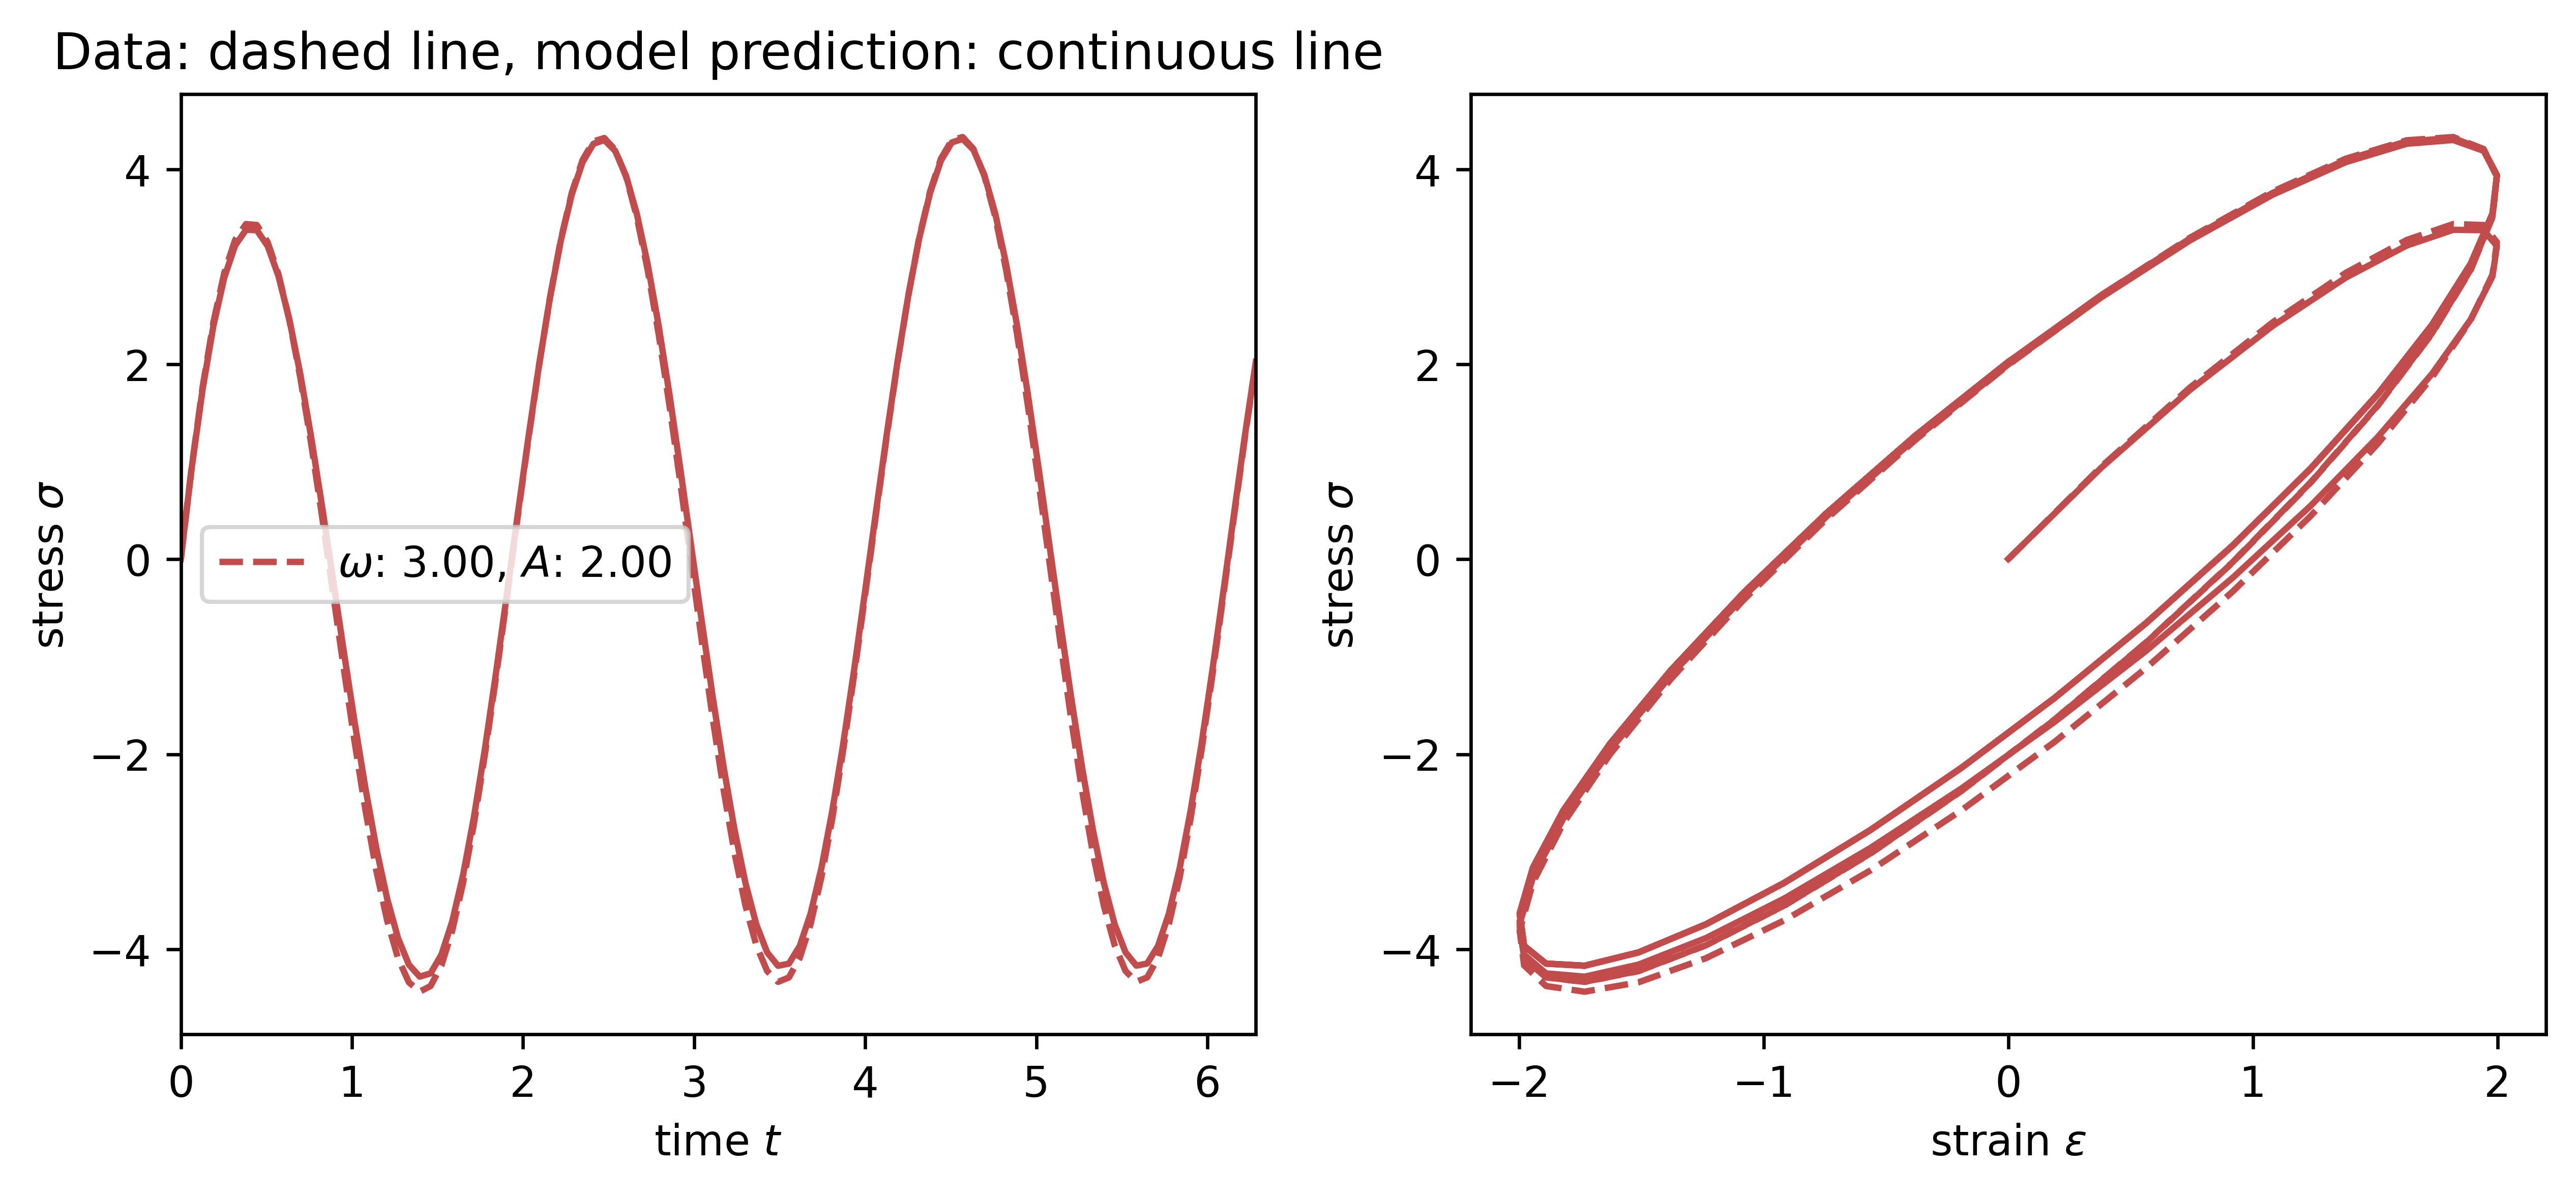

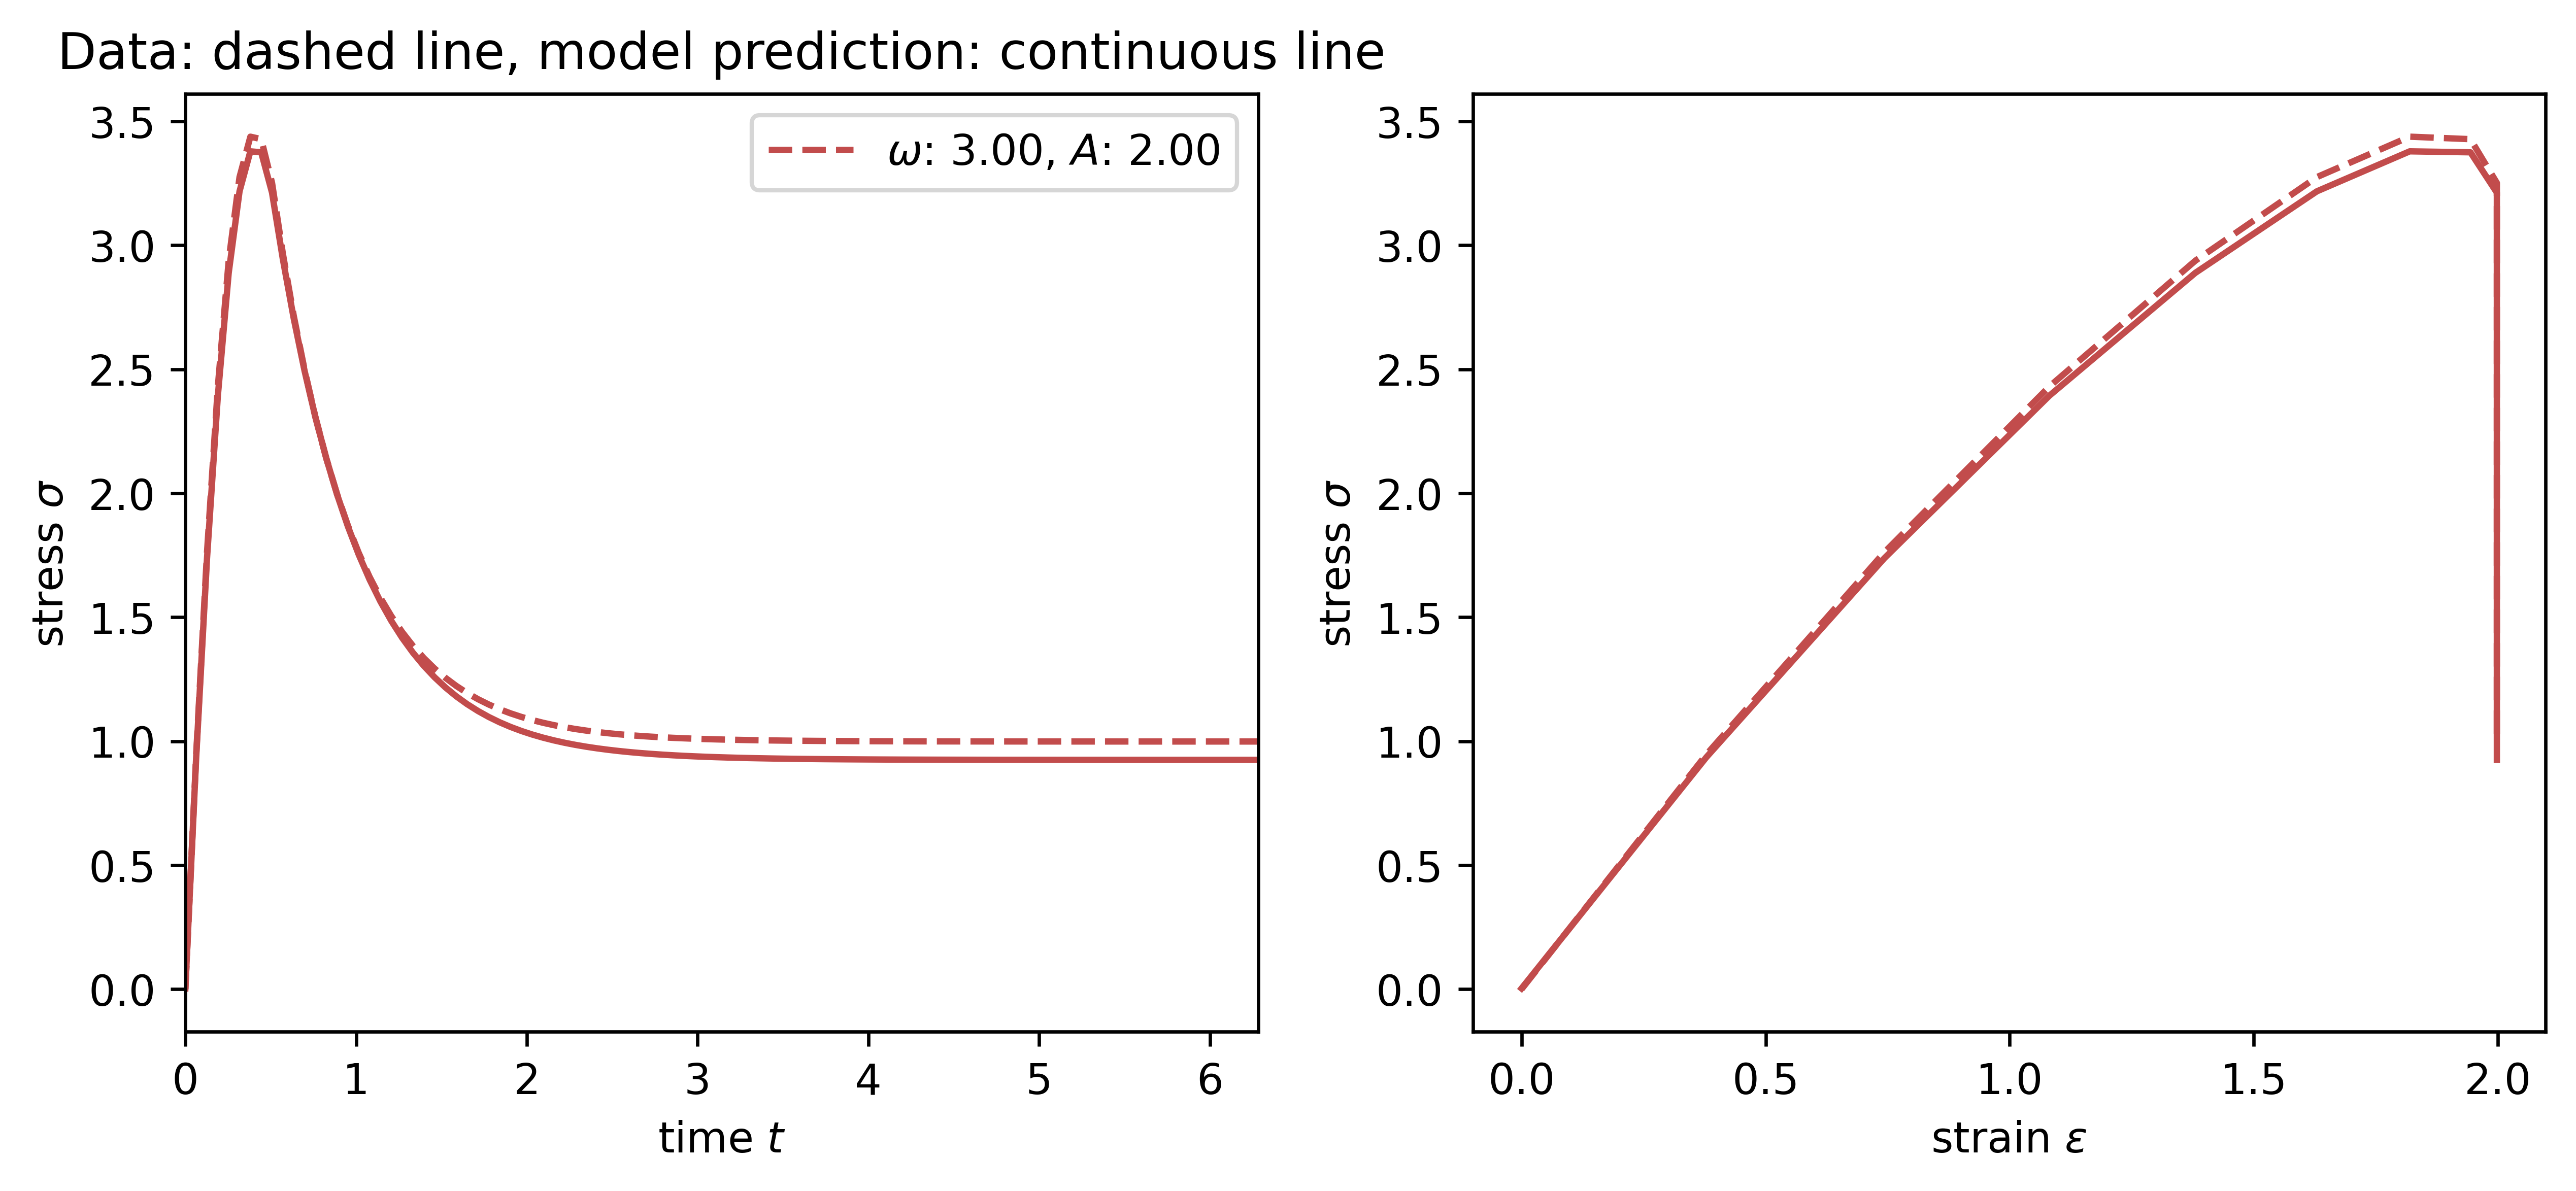

In [15]:
n = 100
As = [2]
omegas = [3]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)


eps, eps_dot, sig, dts = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)

2025-02-02 14:59:09.119777
Epoch 1/10000
1/1 - 1s - loss: 0.2137 - 885ms/epoch - 885ms/step
Epoch 2/10000
1/1 - 0s - loss: 0.1874 - 9ms/epoch - 9ms/step
Epoch 3/10000
1/1 - 0s - loss: 0.1635 - 15ms/epoch - 15ms/step
Epoch 4/10000
1/1 - 0s - loss: 0.1420 - 10ms/epoch - 10ms/step
Epoch 5/10000
1/1 - 0s - loss: 0.1230 - 12ms/epoch - 12ms/step
Epoch 6/10000
1/1 - 0s - loss: 0.1062 - 10ms/epoch - 10ms/step
Epoch 7/10000
1/1 - 0s - loss: 0.0918 - 12ms/epoch - 12ms/step
Epoch 8/10000
1/1 - 0s - loss: 0.0795 - 9ms/epoch - 9ms/step
Epoch 9/10000
1/1 - 0s - loss: 0.0694 - 13ms/epoch - 13ms/step
Epoch 10/10000
1/1 - 0s - loss: 0.0613 - 12ms/epoch - 12ms/step
Epoch 11/10000
1/1 - 0s - loss: 0.0550 - 10ms/epoch - 10ms/step
Epoch 12/10000
1/1 - 0s - loss: 0.0504 - 11ms/epoch - 11ms/step
Epoch 13/10000
1/1 - 0s - loss: 0.0472 - 11ms/epoch - 11ms/step
Epoch 14/10000
1/1 - 0s - loss: 0.0454 - 11ms/epoch - 11ms/step
Epoch 15/10000
1/1 - 0s - loss: 0.0446 - 11ms/epoch - 11ms/step
Epoch 16/10000
1/1 - 0s 

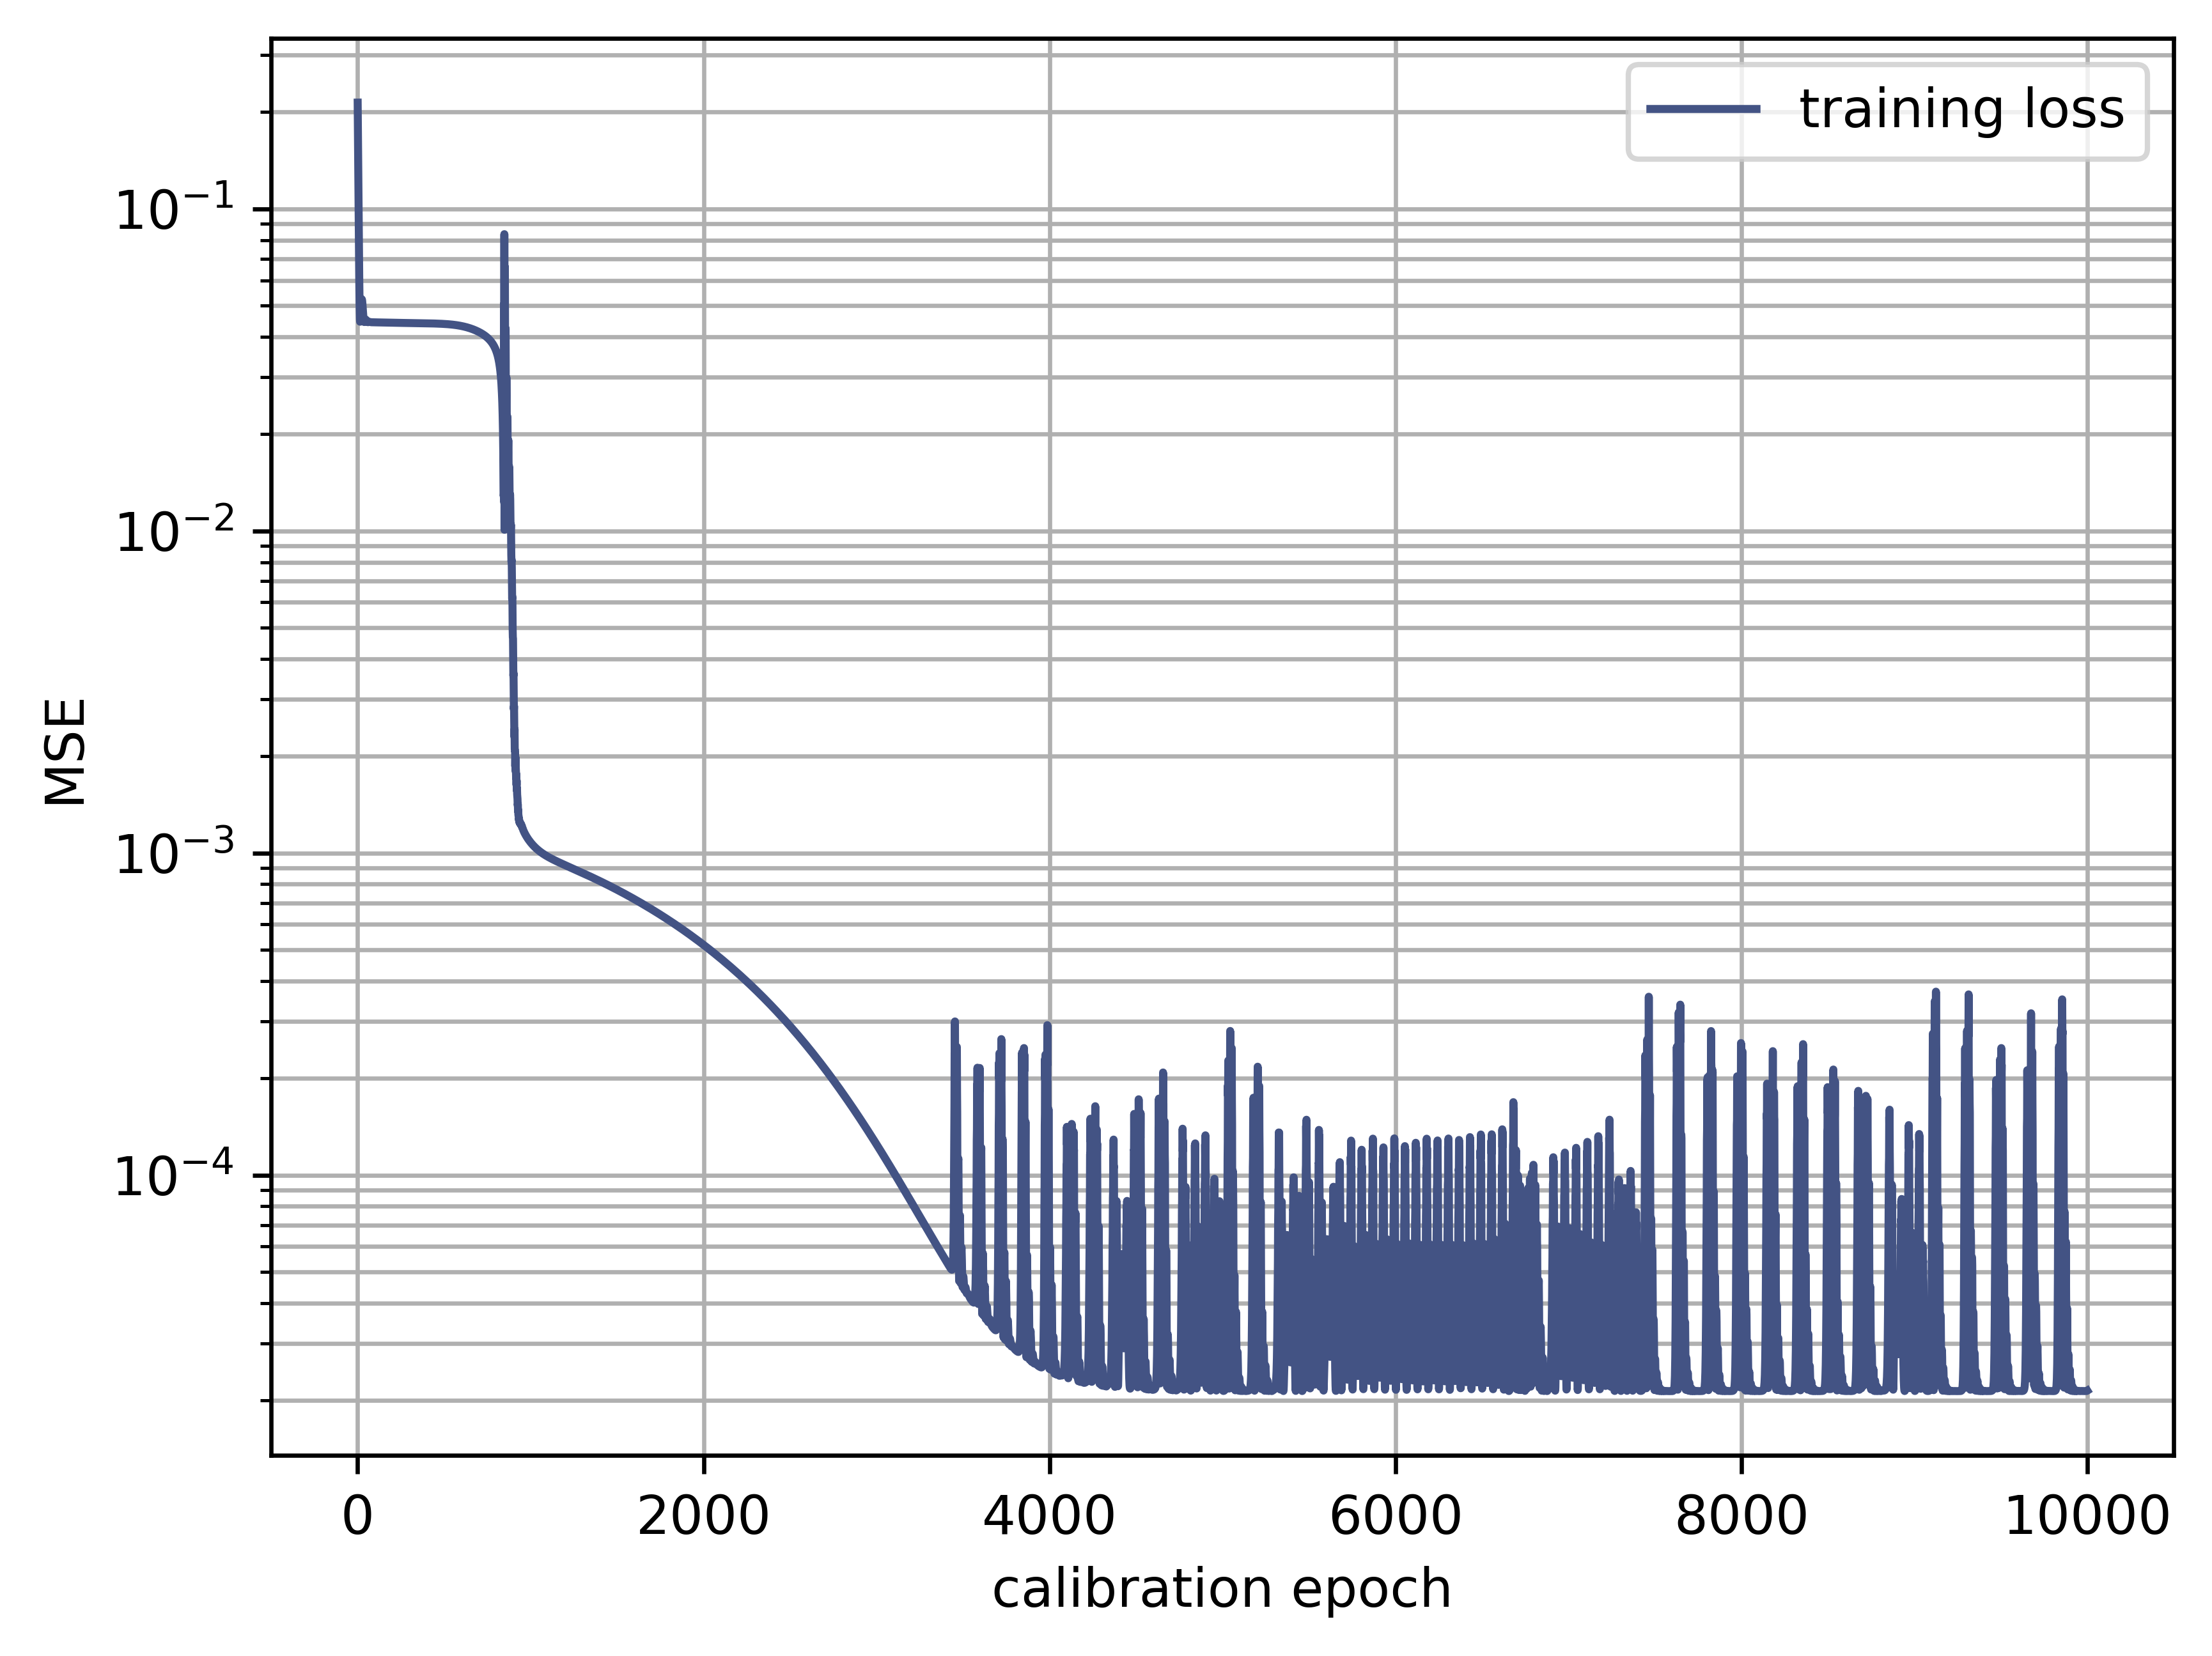

In [17]:

# %%   
"""
Load and visualize data

"""


E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [1]
As = [1]

# 生成 n=100 的谐波数据
n = 100


eps, eps_dot, sig, dts = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)

#lp.plot_data(eps, eps_dot, sig, omegas, As)

# %%   
"""
Load and evaluate model

"""

model2 = hc.main()


t1 = now()
print(t1)

tf.keras.backend.set_value(model2.optimizer.learning_rate, 0.001)
h = model2.fit([eps, dts], [sig], epochs = 10000,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')


plt.figure(1, dpi=600)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()





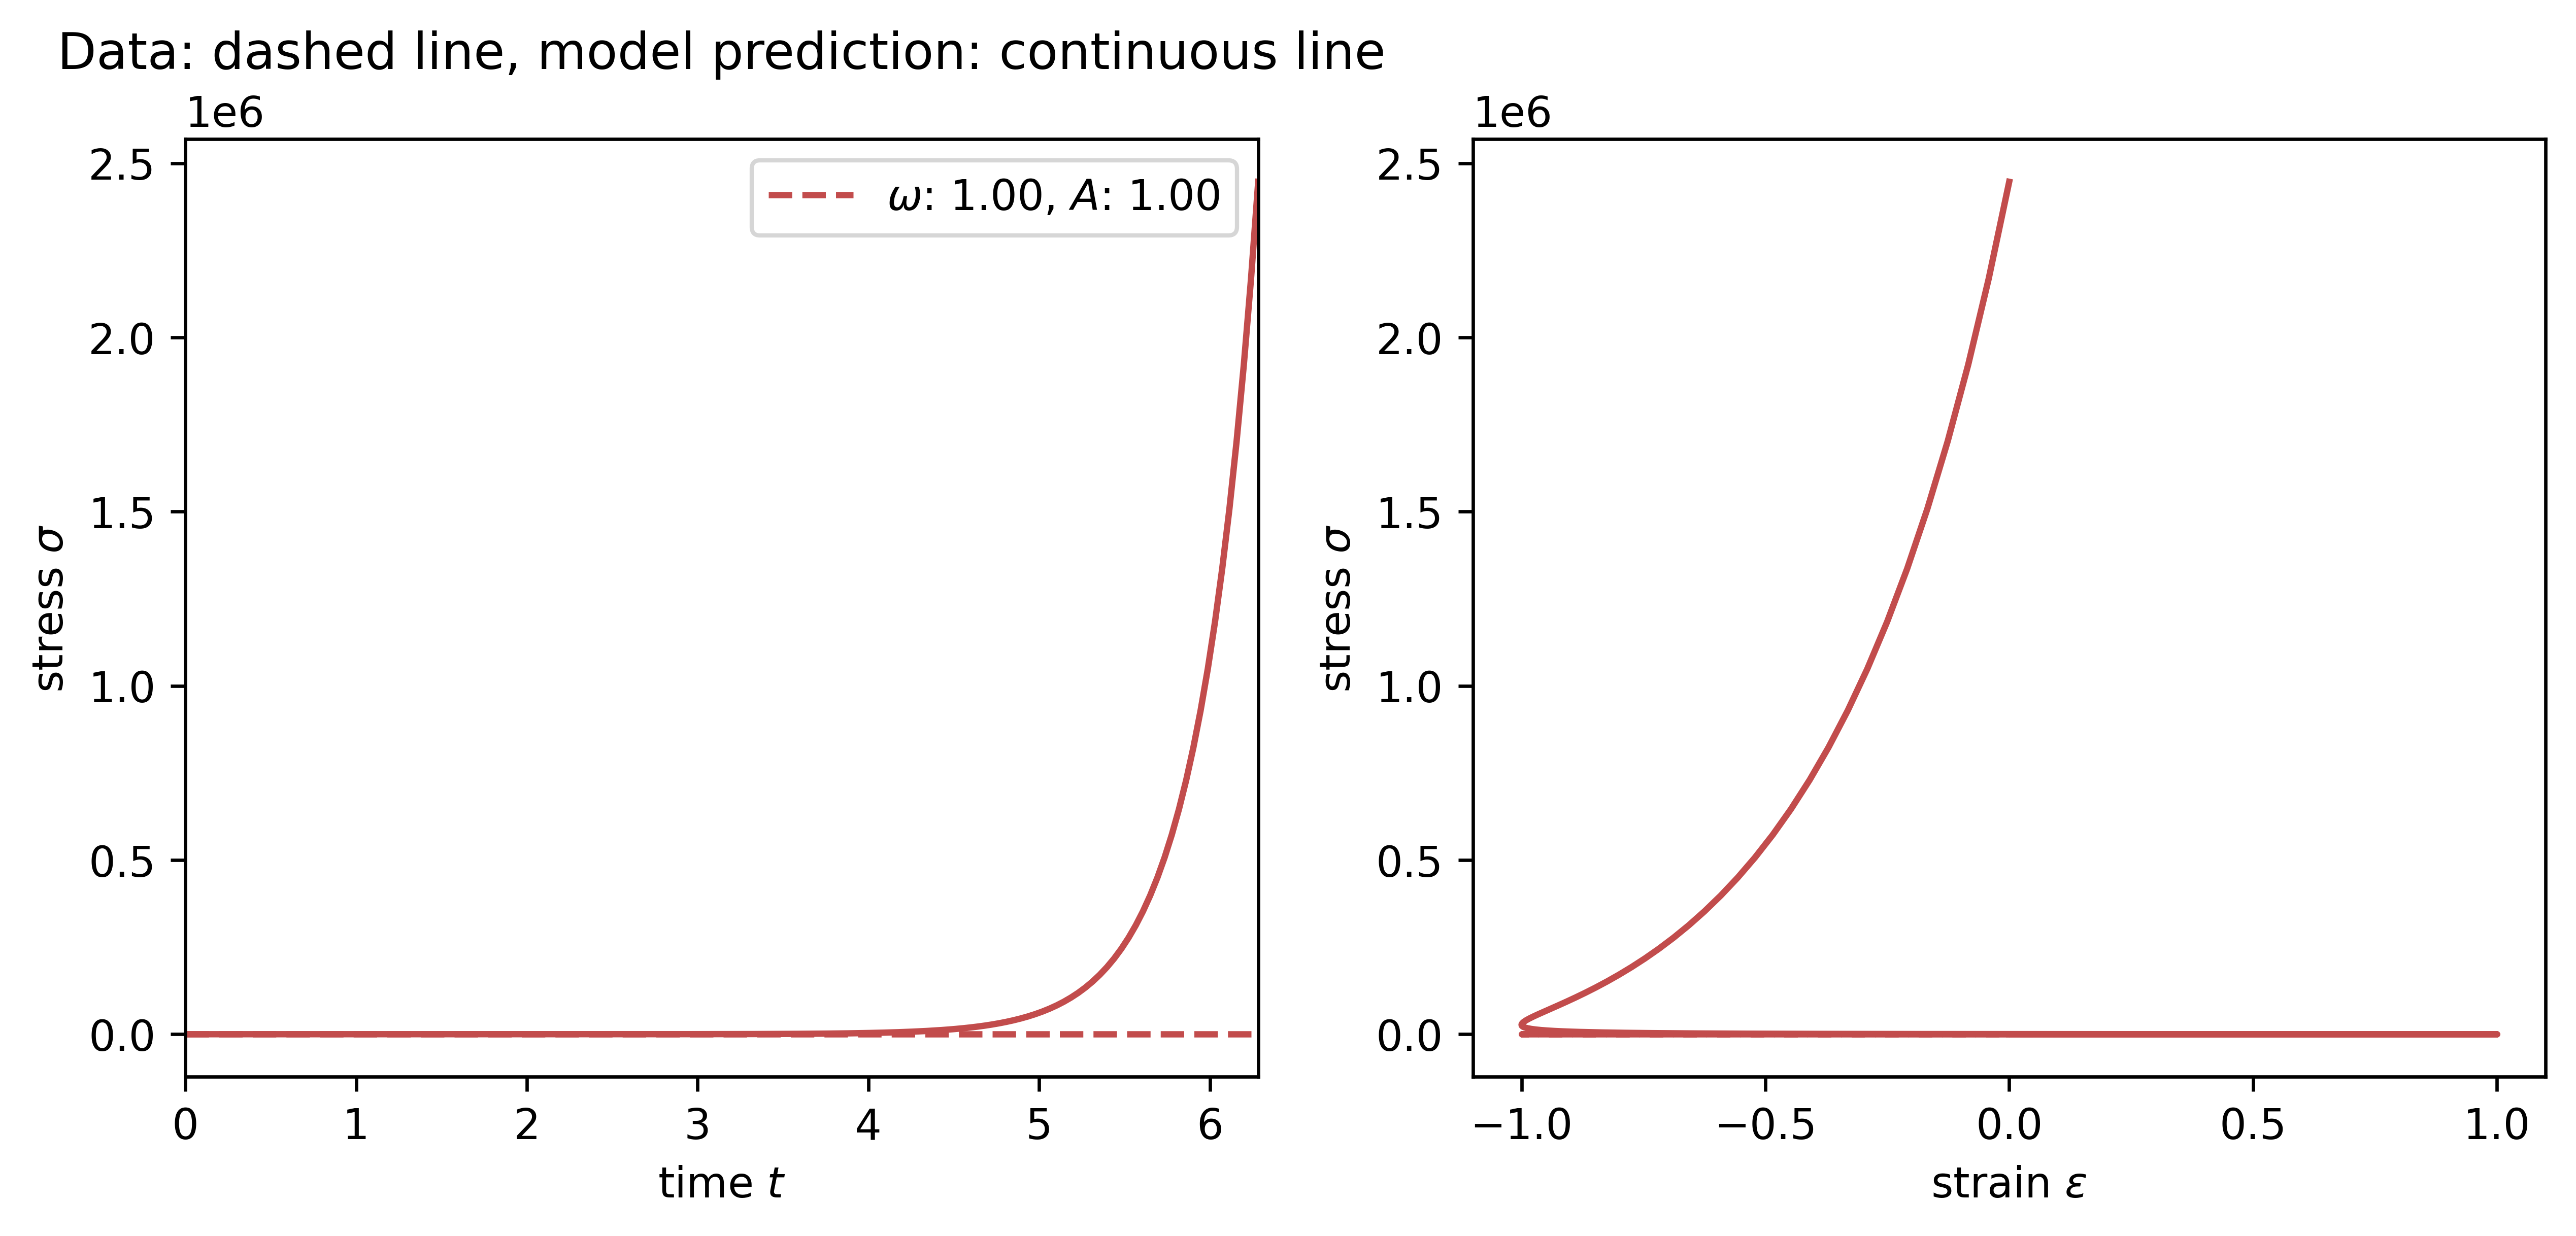

In [18]:
n = 150
As = [1]
omegas = [1]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model2([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)

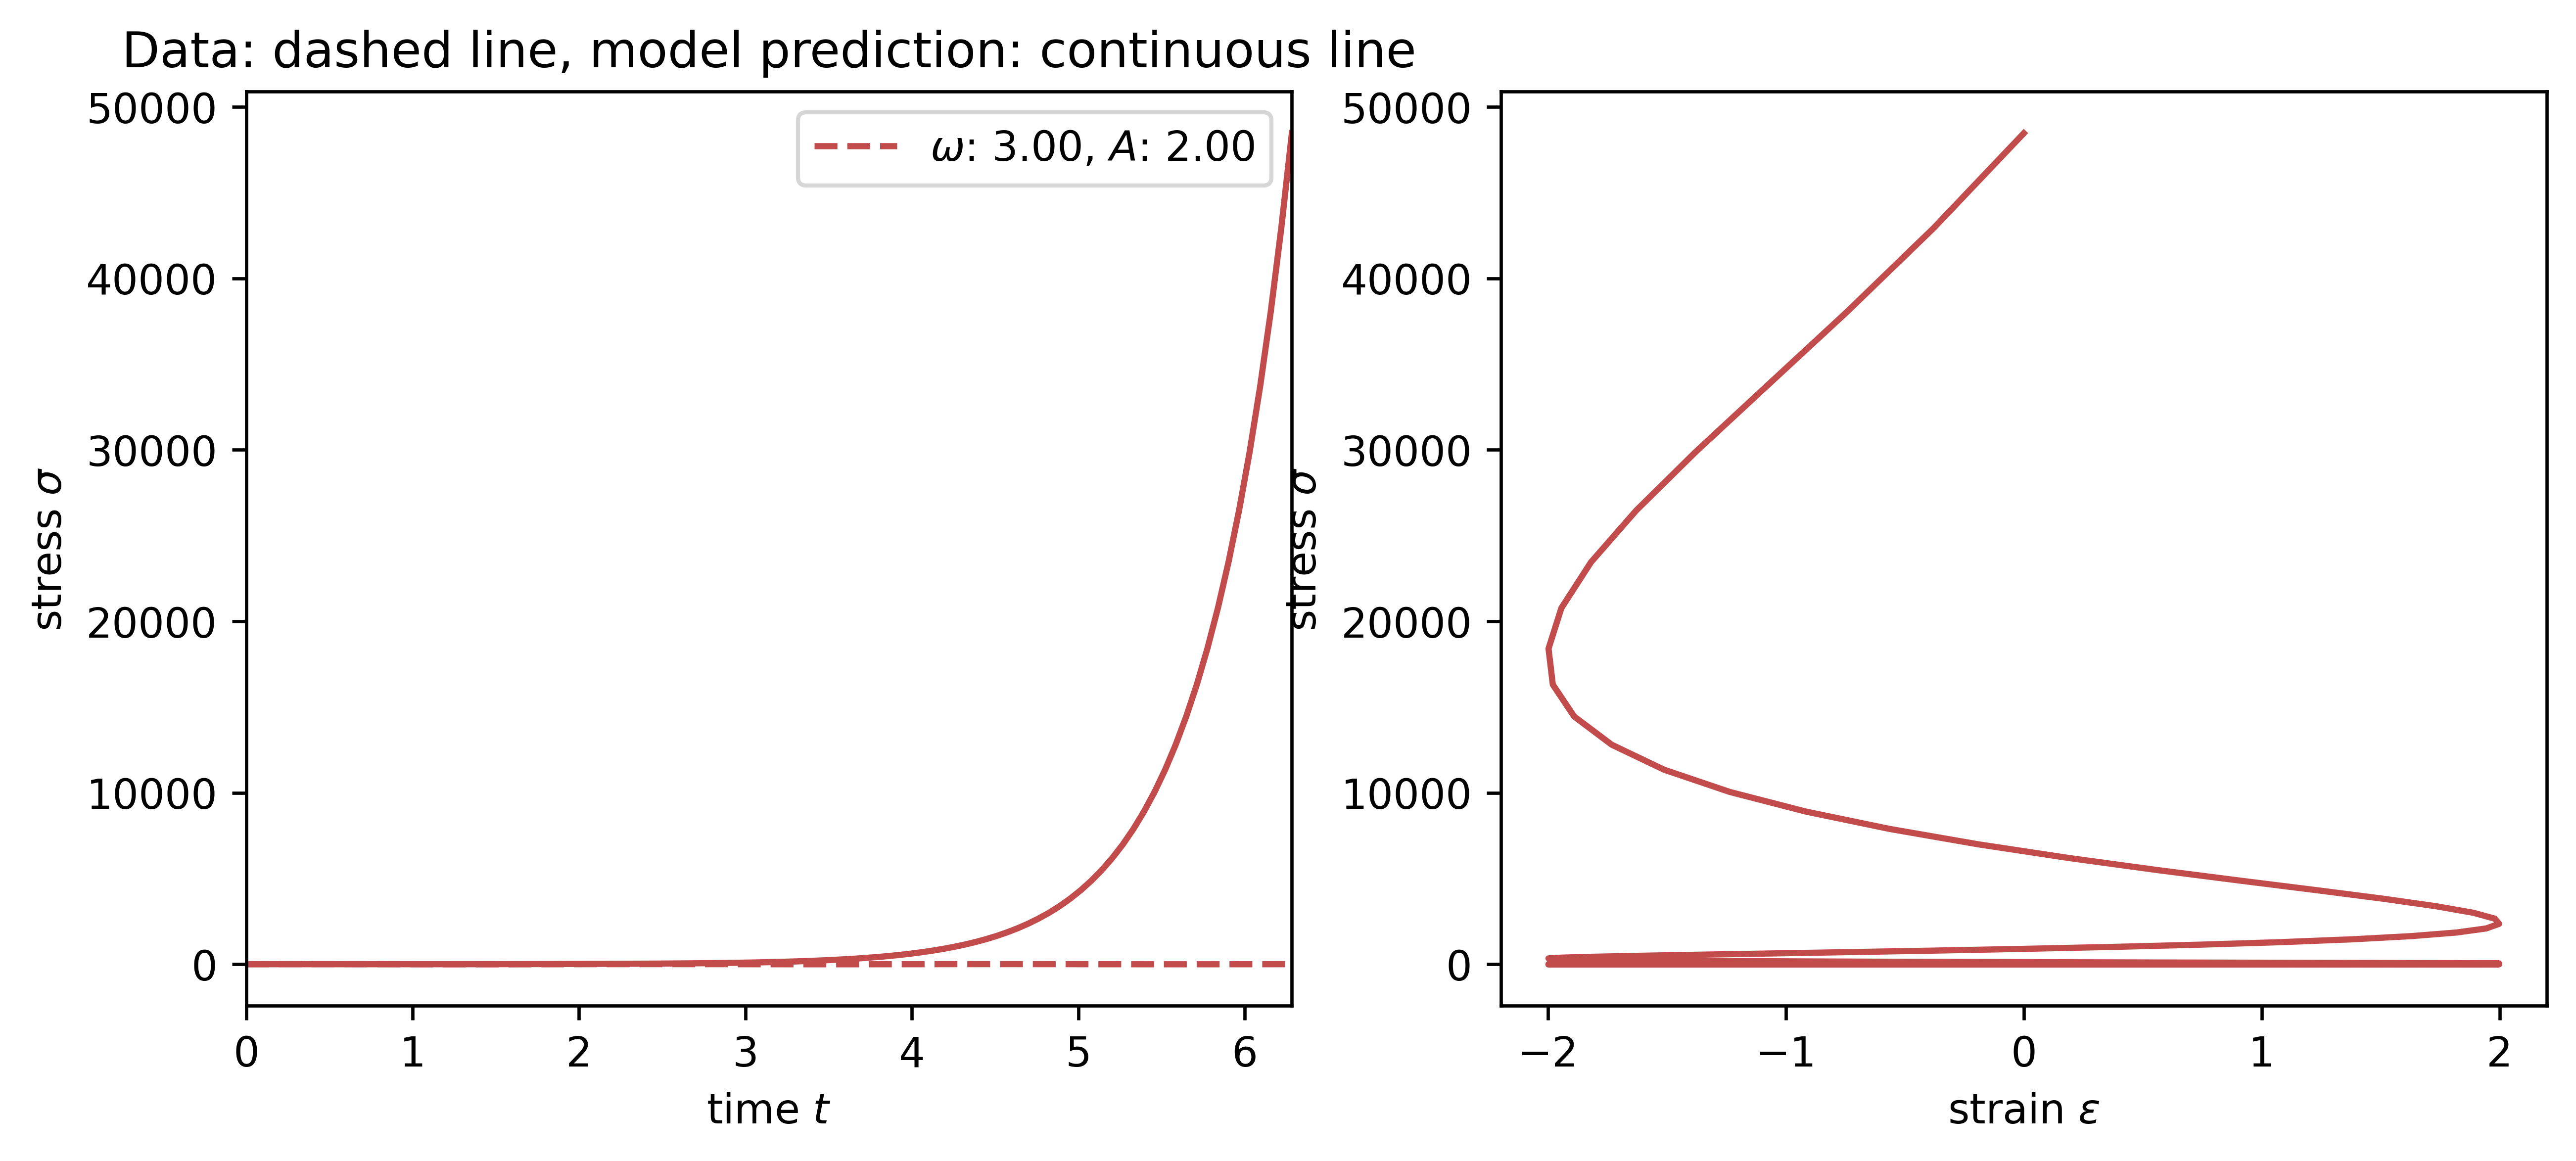

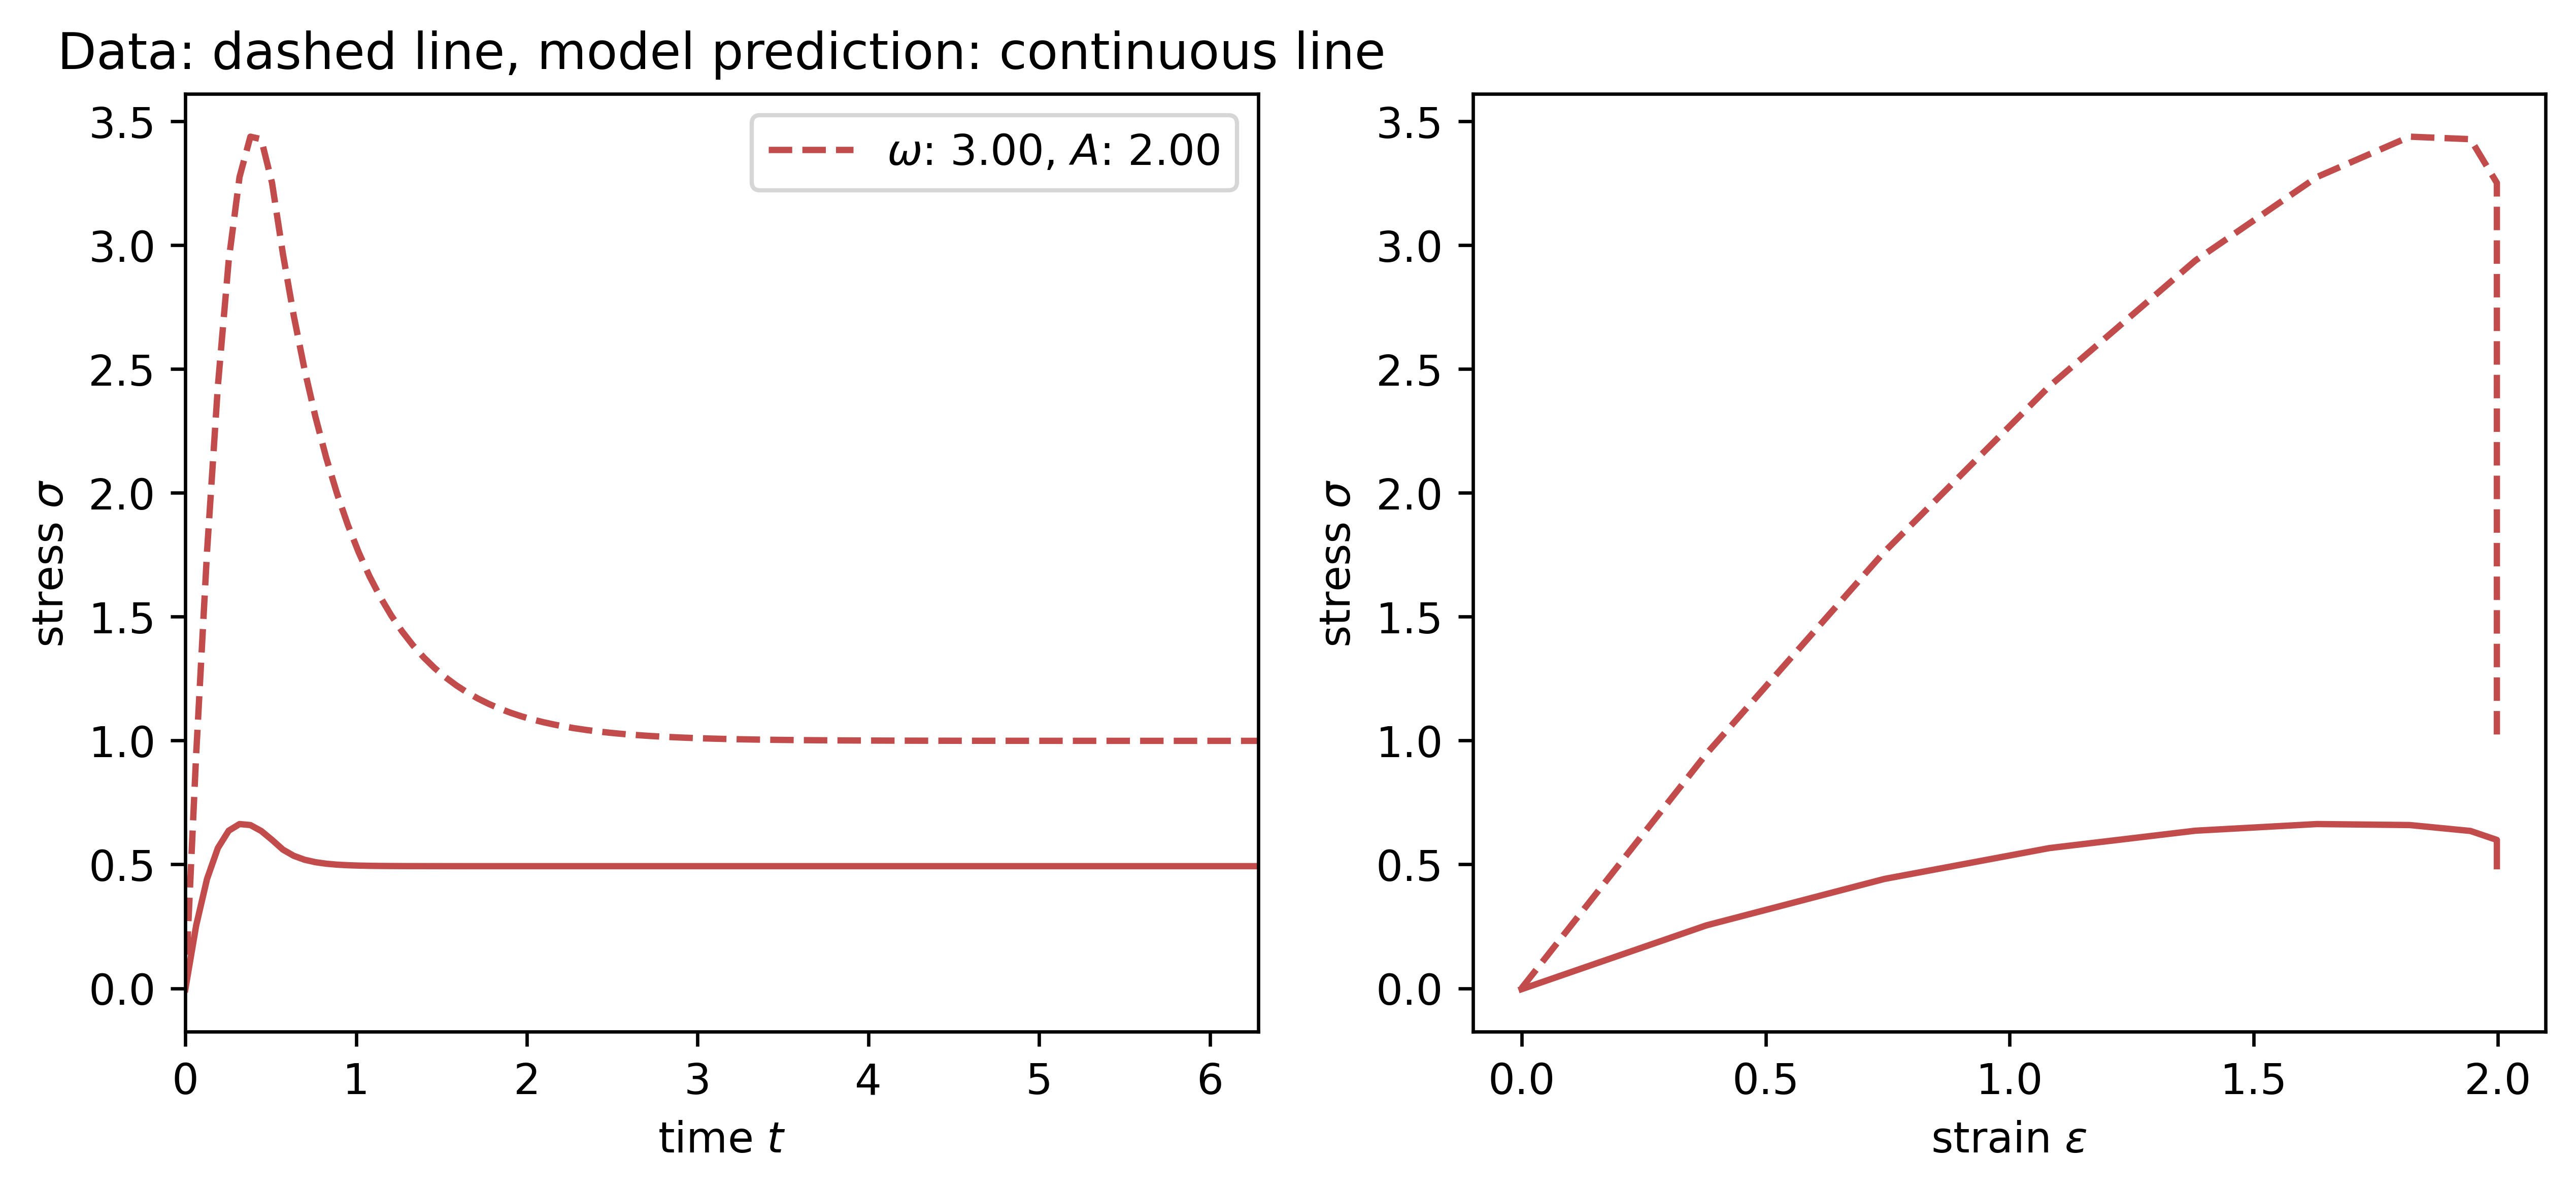

In [19]:
n = 100
As = [2]
omegas = [3]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model2([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)


eps, eps_dot, sig, dts = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m = model2([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)

2025-02-03 13:26:49.117113
Epoch 1/10000
1/1 - 1s - loss: 6.5393 - 1s/epoch - 1s/step
Epoch 2/10000
1/1 - 0s - loss: 6.4511 - 9ms/epoch - 9ms/step
Epoch 3/10000
1/1 - 0s - loss: 6.3658 - 11ms/epoch - 11ms/step
Epoch 4/10000
1/1 - 0s - loss: 6.2834 - 13ms/epoch - 13ms/step
Epoch 5/10000
1/1 - 0s - loss: 6.2038 - 11ms/epoch - 11ms/step
Epoch 6/10000
1/1 - 0s - loss: 6.1271 - 17ms/epoch - 17ms/step
Epoch 7/10000
1/1 - 0s - loss: 6.0532 - 15ms/epoch - 15ms/step
Epoch 8/10000
1/1 - 0s - loss: 5.9820 - 13ms/epoch - 13ms/step
Epoch 9/10000
1/1 - 0s - loss: 5.9135 - 14ms/epoch - 14ms/step
Epoch 10/10000
1/1 - 0s - loss: 5.8476 - 12ms/epoch - 12ms/step
Epoch 11/10000
1/1 - 0s - loss: 5.7842 - 10ms/epoch - 10ms/step
Epoch 12/10000
1/1 - 0s - loss: 5.7233 - 12ms/epoch - 12ms/step
Epoch 13/10000
1/1 - 0s - loss: 5.6648 - 12ms/epoch - 12ms/step
Epoch 14/10000
1/1 - 0s - loss: 5.6086 - 11ms/epoch - 11ms/step
Epoch 15/10000
1/1 - 0s - loss: 5.5546 - 12ms/epoch - 12ms/step
Epoch 16/10000
1/1 - 0s - lo

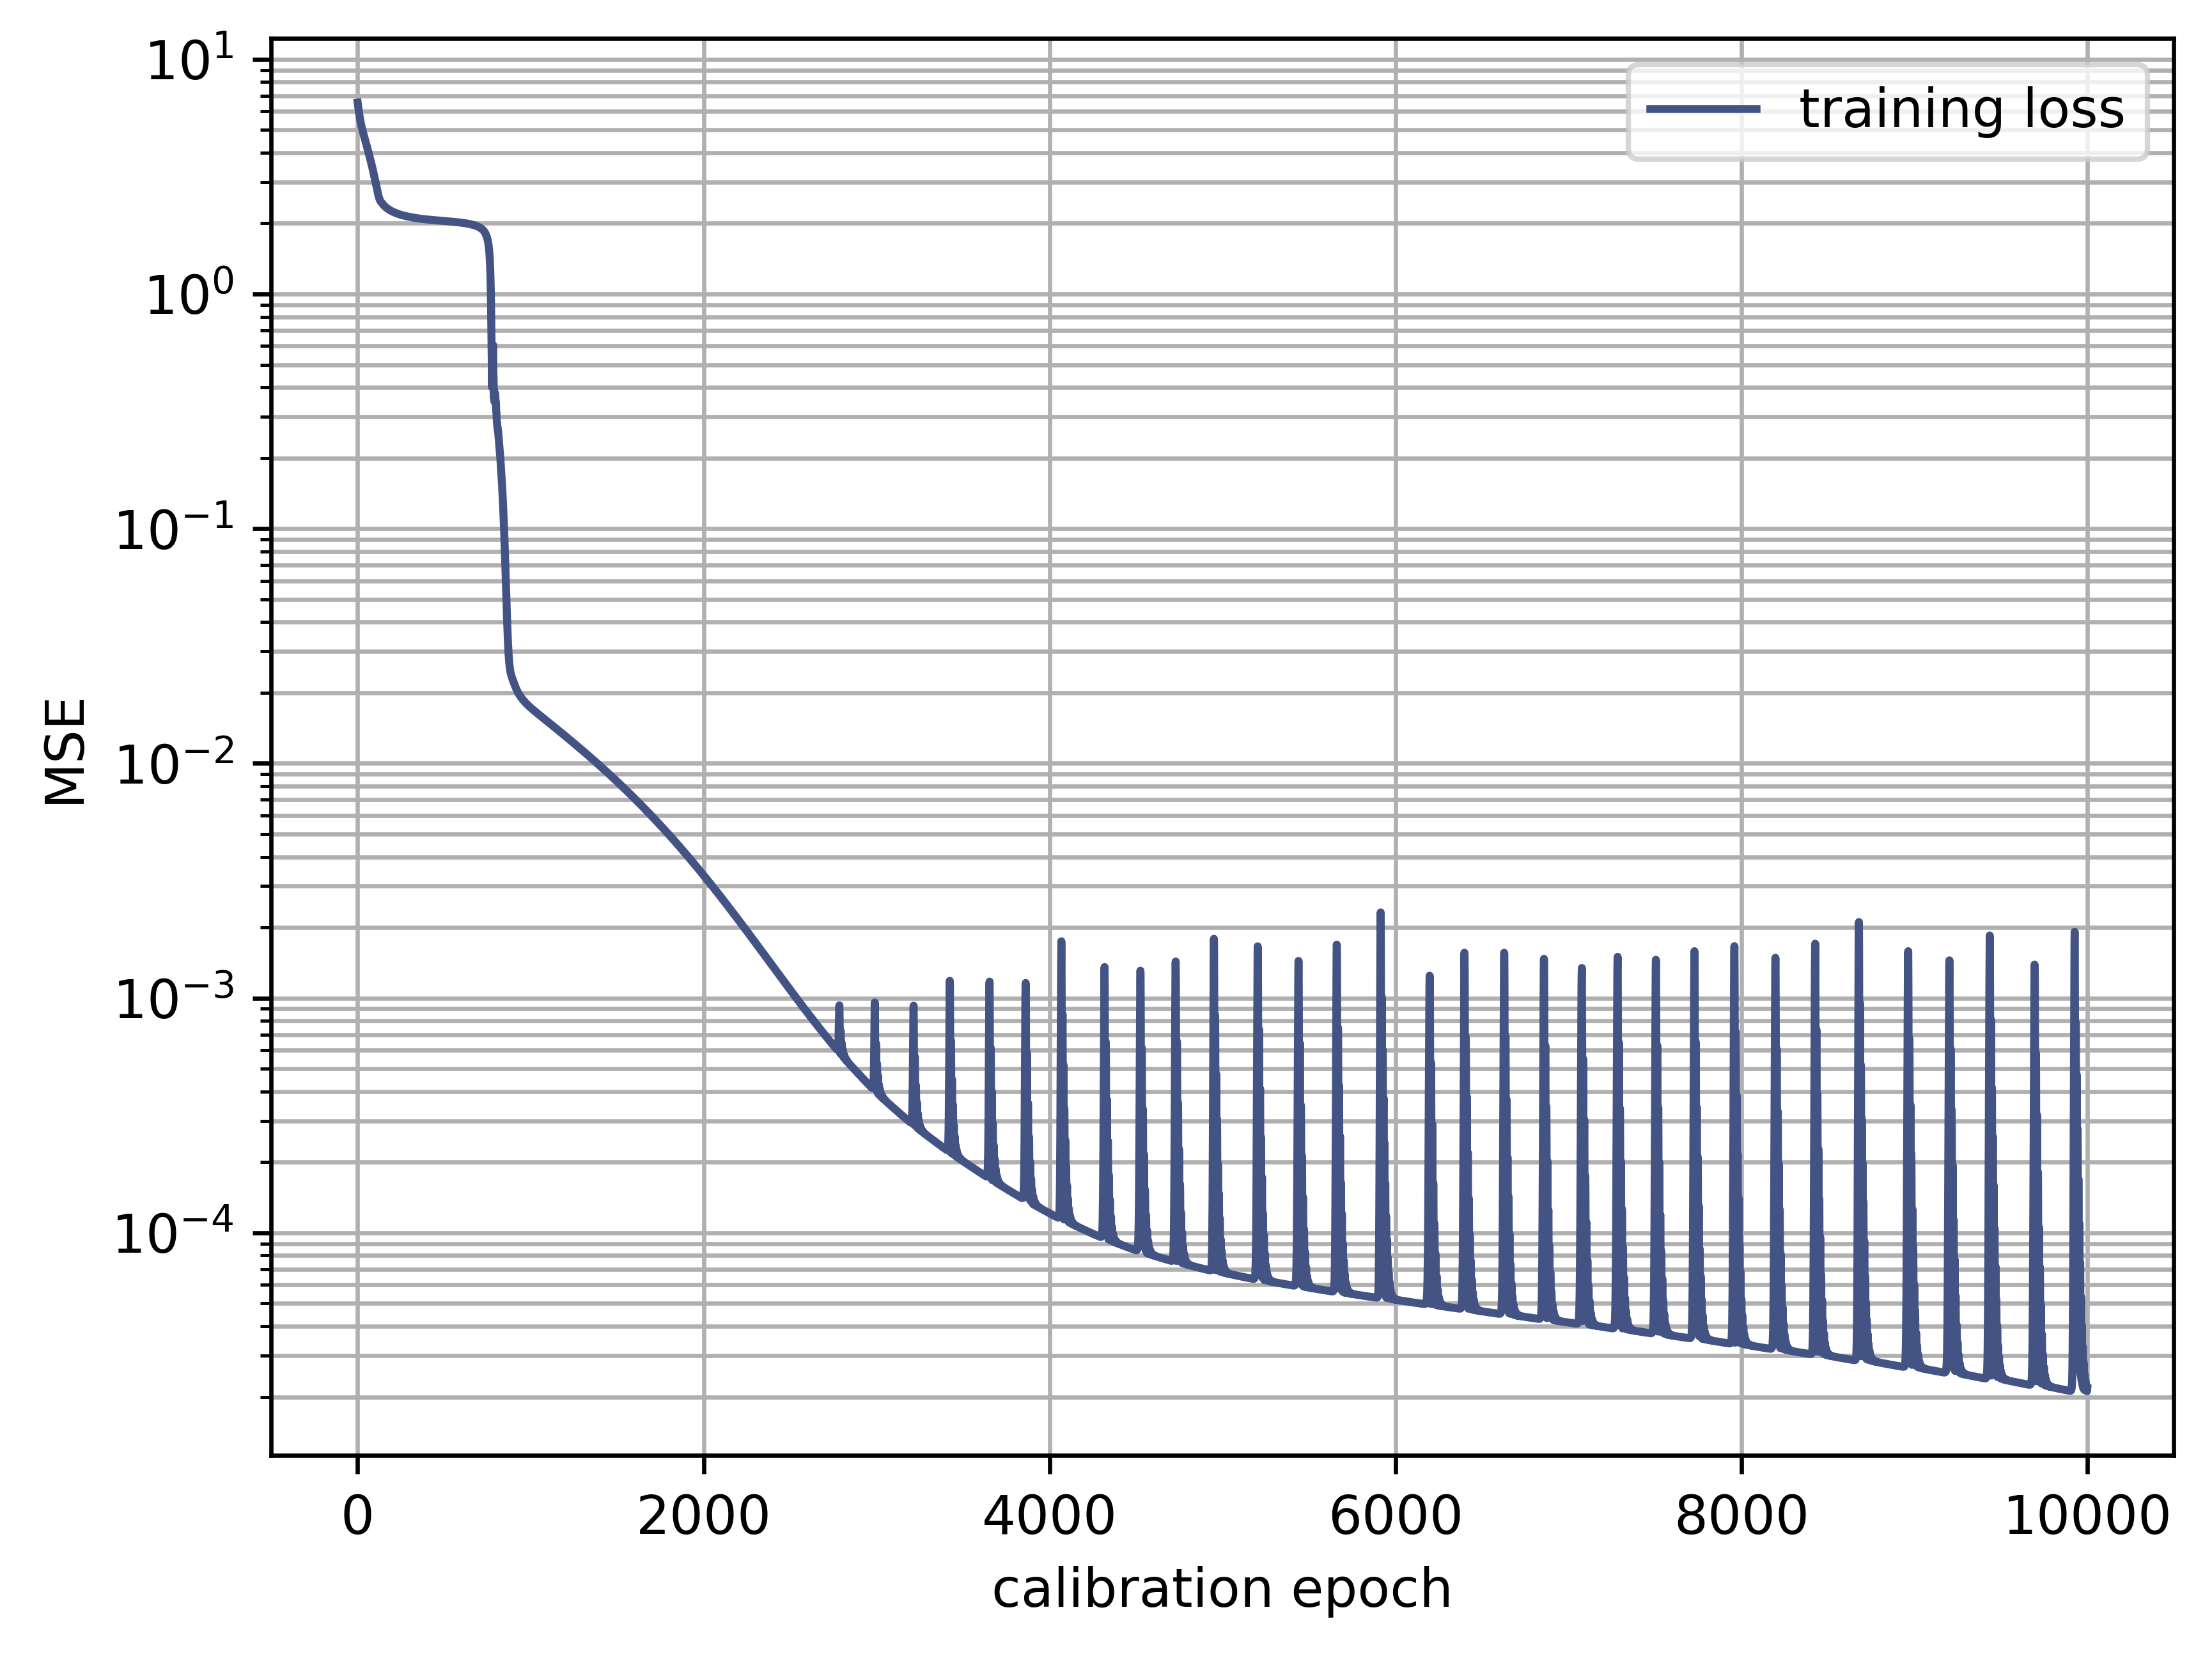

In [2]:
import numpy as np
# %%   
"""
Load and visualize data

"""


# 参数设置
E_infty = 0.5
E = 2
eta = 1

omegas = [2]
As = [2]

n = 100

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)

#lp.plot_data(eps, eps_dot, sig, omegas, As)



# %%   
"""
Load and evaluate model

"""

model = hc.main()


t1 = now()
print(t1)

tf.keras.backend.set_value(model.optimizer.learning_rate, 0.001)
h = model.fit([eps, dts], [sig], epochs = 10000,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')


plt.figure(1, dpi=600)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()





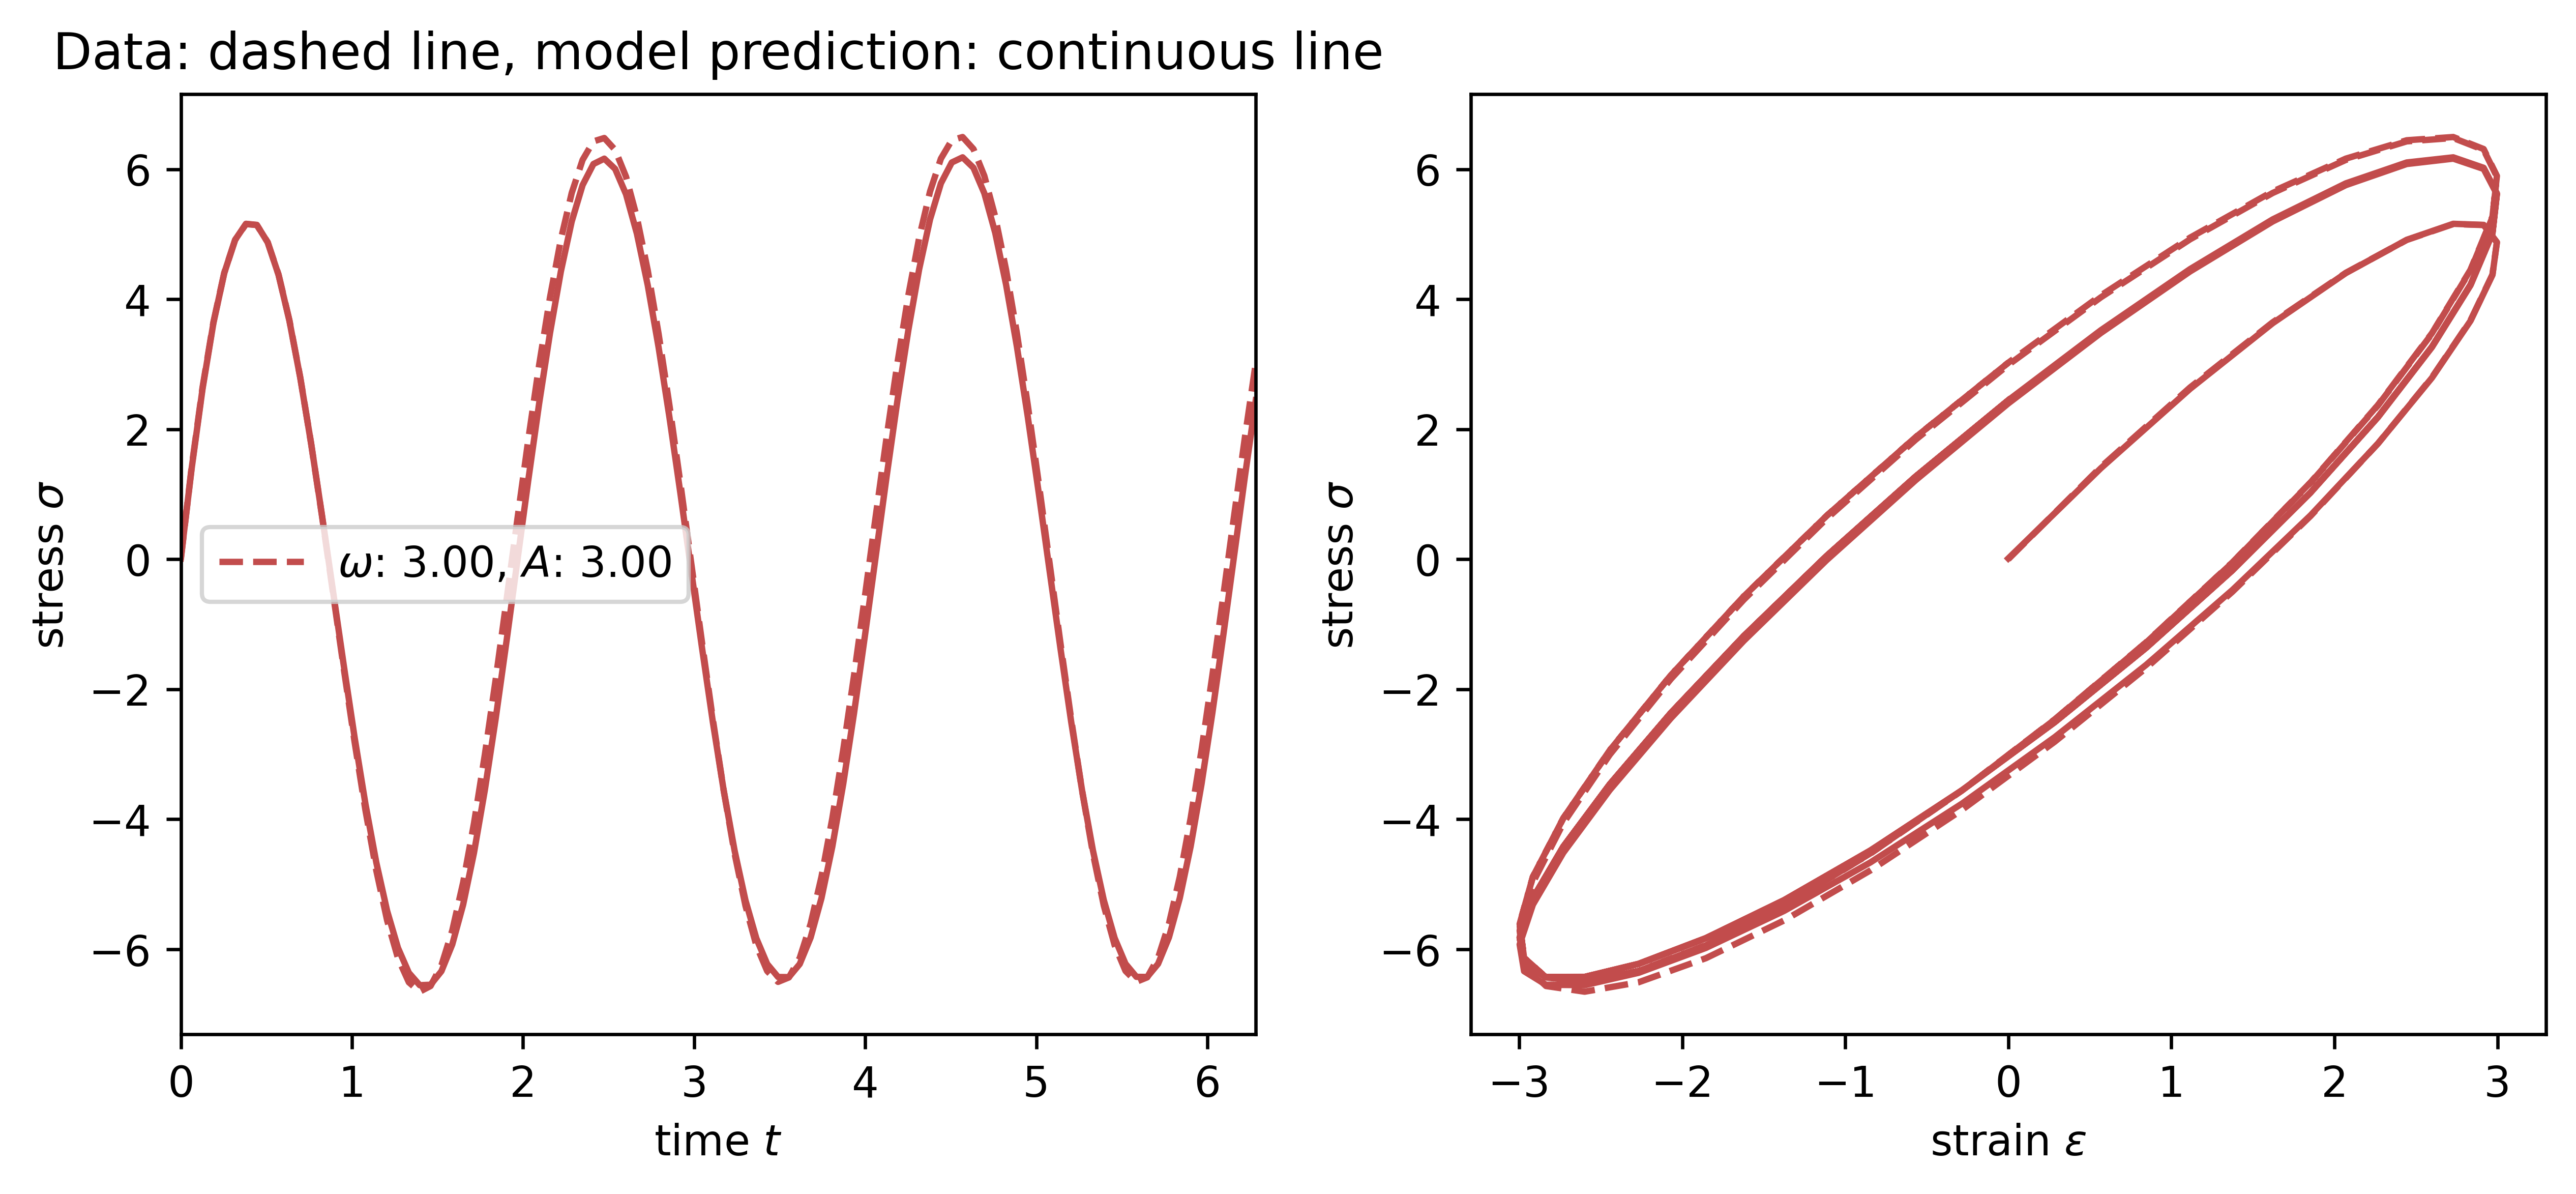

In [5]:
n = 100
As = [3]
omegas = [3]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
#lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)